#Integrantes:
- Diego Nicolas Rubio Lopez
- Juan Sebastían Silva Castillo
- Juan Diego Castañeda Oviedo

# Monte Carlo Integration

**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_1^5 x^2 dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

**integrate(x\*\*2)**

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/intX2Wolfram.png" />

**integrate_{1}^{5}(x\*\*2)dx**


<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/intX2DefWolfram.png" />



## Sympy symbolic integration
* integrate https://docs.sympy.org/latest/modules/integrals/integrals.html 
* Symbol https://docs.sympy.org/latest/modules/core.html#symbol
* cos https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* sin https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* pi https://docs.sympy.org/latest/modules/core.html#pi 
* Rational https://docs.sympy.org/latest/modules/core.html#rational 
* evaluate https://docs.sympy.org/latest/modules/evalf.html
* basic operations https://docs.sympy.org/latest/tutorial/basic_operations.html

In [ ]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**2)
print(i)
result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x**3/3
Analytical result: 41.333333333333336


In [2]:
#EXAMPLE
import sympy
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**4/5-7)
print(i)
result["analytical"] = float(i.subs(x, 6) - i.subs(x, 2))
print("Analytical result: {}".format(result["analytical"]))


x**5/25 - 7*x
Analytical result: 281.76



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom.png" />

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[1,5]$ and evaluate the fucntion $f(x)=x^2$ in ecah random point $f_i = r_i^2$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i = 31/3 = 10.333\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =10.333\cdots$ and $volume(I)=(5-1)$ therefore the estimation integral is 

$$
\int_1^5 x^2 dx \approx volume(I) \times \overline{f} = (5-1) \times 10.33333\cdots = 41.333\cdots
$$ 

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom1.png" />


In [ ]:
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 41.34136202051488


In [ ]:
#EXAMPLE
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

**integrate_{1}^{5}(x\*\*2 * sin(x)\*\*3)dx**

> Indented block



<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram8.jpg" />

In [ ]:
import sympy
x = sympy.Symbol("x")  
i = sympy.integrate(x**2 * sympy.sin(x)**3)
print(i)
print(float(i.subs(x, 5) - i.subs(x, 1)))

-x**2*sin(x)**2*cos(x) - 2*x**2*cos(x)**3/3 + 14*x*sin(x)**3/9 + 4*x*sin(x)*cos(x)**2/3 + 14*sin(x)**2*cos(x)/9 + 40*cos(x)**3/27
-15.42978215330555


In [5]:
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2 * numpy.sin(x)**3
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -15.526923459872844


**integrate_{-4}^{10}(32x * cos(x)^5 + x^4)dx**

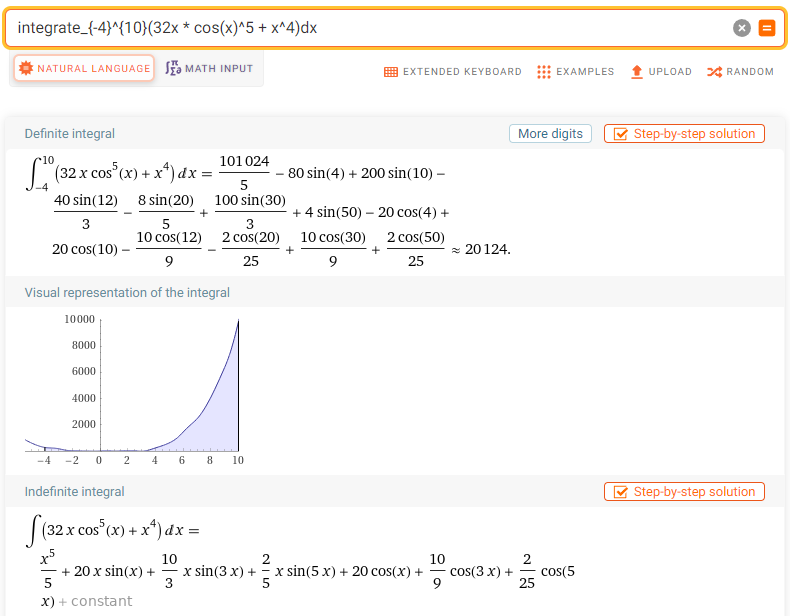

In [3]:
#EXAMPLE
import sympy
x = sympy.Symbol("x")  
i = sympy.integrate(32 * x * sympy.cos(x)**5 + x**4)
print(i)
print(float(i.subs(x, 10) - i.subs(x, -4)))

x**5/5 + 256*x*sin(x)**5/15 + 128*x*sin(x)**3*cos(x)**2/3 + 32*x*sin(x)*cos(x)**4 + 256*sin(x)**4*cos(x)/15 + 1664*sin(x)**2*cos(x)**3/45 + 4768*cos(x)**5/225
20123.819451277606


In [6]:
#EXAMPLE
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(-4, 10)
    accum += 32 * x * sympy.cos(x)**5 + x**4
volume = 10 - (-4)
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 20047.0629427855


# Monte Carlo Area Approximation



![MontecarloAreas.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloAreas.png)

## Polar Curves - Brilliant

* https://brilliant.org/wiki/polar-curves/

![PolarCurvesBrilliant.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesBrilliant.png)

### Area inside of polar curve - UT Calculus

* https://web.ma.utexas.edu/users/m408s/m408d/CurrentWeb/LM10-4-2.php

![IntPolarCurvesUTCalculus.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesUTCalculus.png)


# Plotting and Calculating the Area with Wolfram Alpha 

## polar r=1−cosθsin33θ, θ in[0,2pi]  (Group 33)

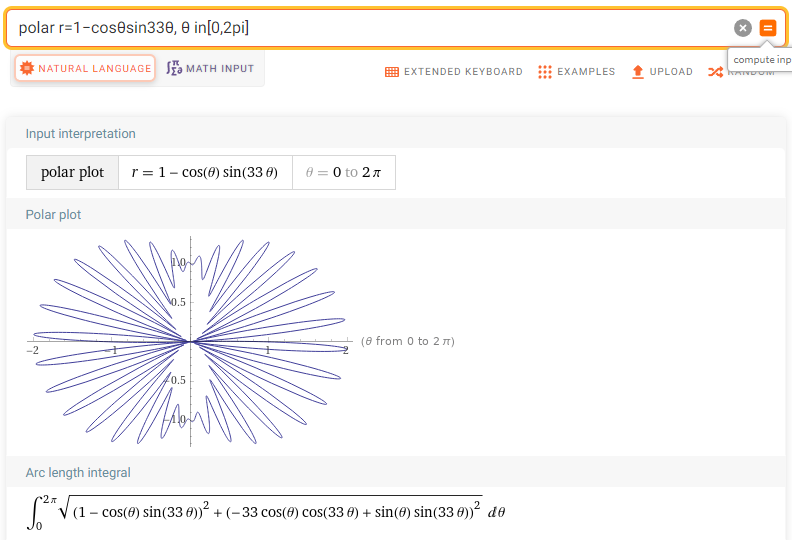

## 1/2 int_0^{2pi} (1-cosθsin33θ)^2 dθ 

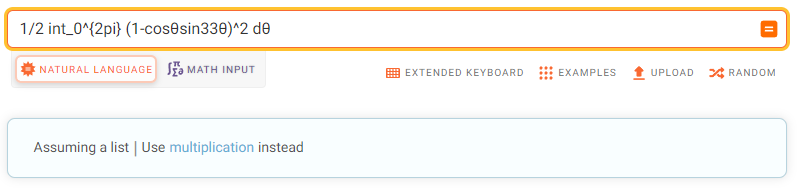


##  area under 1/2 (1-cos t sin 33t)^ 2 for 0<t<2pi

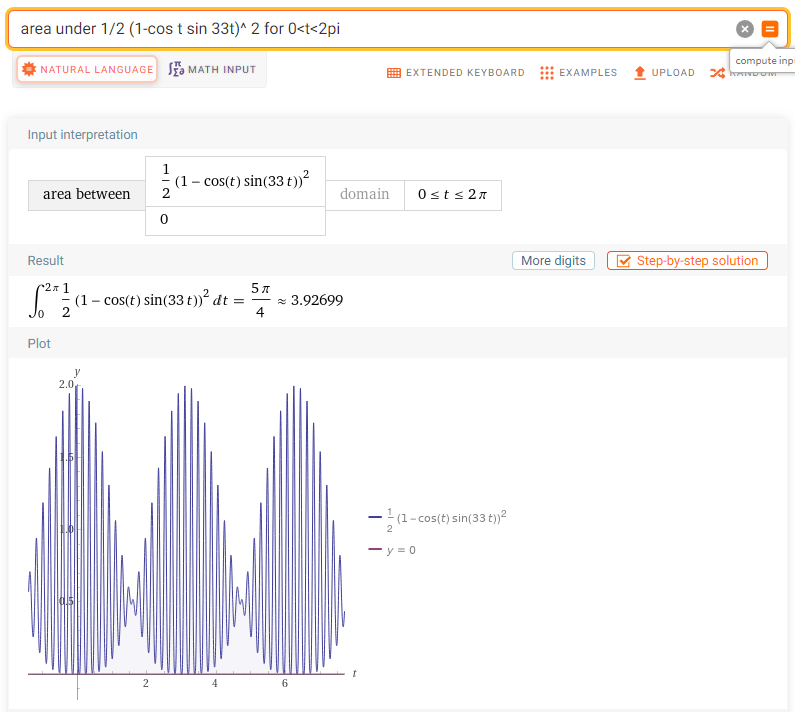



## 1/2 integral(1 - cos(θ) sin(33 θ))^2 dθ 



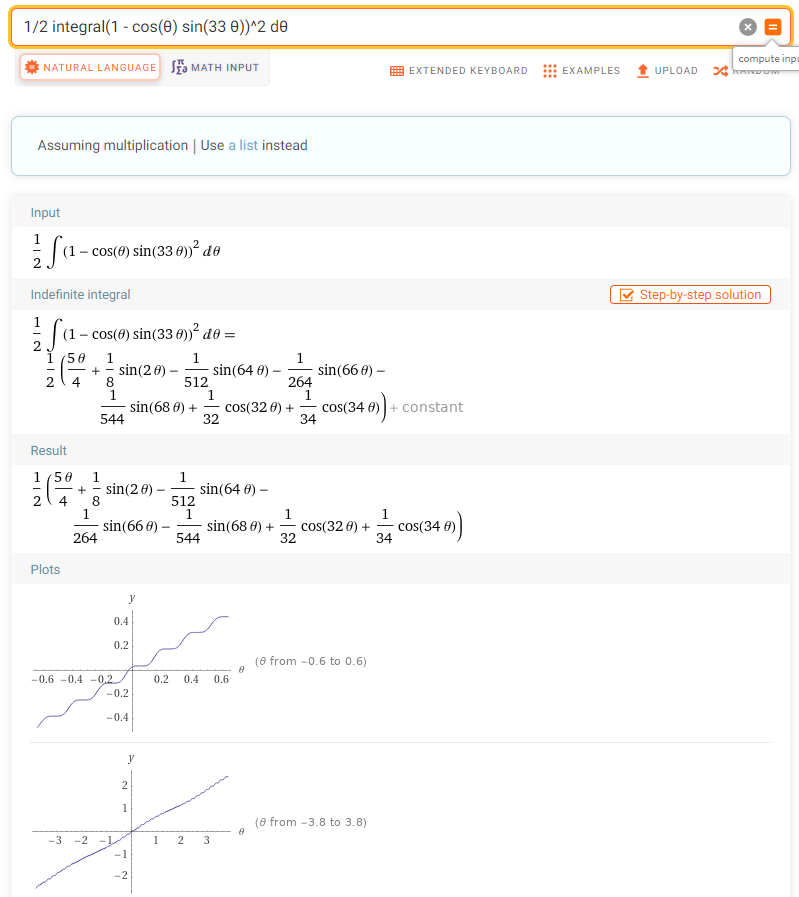




**Now the area inside the polar curve** $r= 1- \cos(\theta) \sin(3\theta)$

In [7]:
from sympy import integrate, Symbol, cos, sin, pi,  Rational

theta = Symbol('theta')
integrate((1- cos(theta)* sin(33*theta))**2)

theta*sin(theta)**2*sin(33*theta)**2/4 + theta*sin(theta)**2*cos(33*theta)**2/4 + theta*sin(33*theta)**2*cos(theta)**2/4 + theta*cos(theta)**2*cos(33*theta)**2/4 + theta + sin(theta)**2*sin(33*theta)*cos(33*theta)/143616 + 1087*sin(theta)*sin(33*theta)**2*cos(theta)/4352 + sin(theta)*sin(33*theta)/544 + 1089*sin(theta)*cos(theta)*cos(33*theta)**2/4352 - 2177*sin(33*theta)*cos(theta)**2*cos(33*theta)/143616 + 33*cos(theta)*cos(33*theta)/544

In [8]:
Rational(1,2) * integrate((1- cos(theta)* sin(33*theta))**2)

theta*sin(theta)**2*sin(33*theta)**2/8 + theta*sin(theta)**2*cos(33*theta)**2/8 + theta*sin(33*theta)**2*cos(theta)**2/8 + theta*cos(theta)**2*cos(33*theta)**2/8 + theta/2 + sin(theta)**2*sin(33*theta)*cos(33*theta)/287232 + 1087*sin(theta)*sin(33*theta)**2*cos(theta)/8704 + sin(theta)*sin(33*theta)/1088 + 1089*sin(theta)*cos(theta)*cos(33*theta)**2/8704 - 2177*sin(33*theta)*cos(theta)**2*cos(33*theta)/287232 + 33*cos(theta)*cos(33*theta)/1088

In [9]:
(Rational(1,2) * integrate((1- cos(theta)* sin(33*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((1- cos(theta)* sin(33*theta))**2)).subs(theta,0)

5*pi/4

# Scipy numeric integration

* intregrate.quad https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [10]:
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(1- (math.cos(theta)* math.sin(33*theta)))**2), 0, 2*math.pi)
result

(3.926990816987241, 4.403250843641477e-10)

# Monte Carlo area approximation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


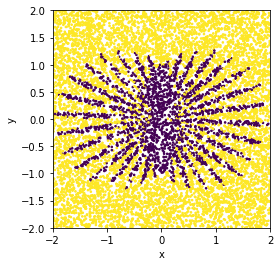

Area approx: 3.8064


In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(33*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [ ]:
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(33*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 3.92488


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [ ]:
import matplotlib.pyplot as plt
import numpy 
import math

# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


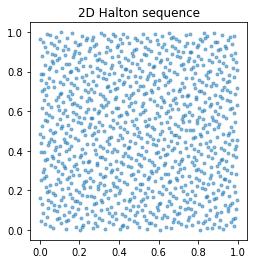

In [ ]:
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


Area approx: 3.824


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


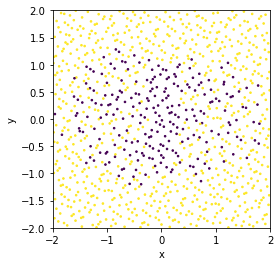

Area approx: 3.824


In [19]:
N = 1000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(33*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


In [ ]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(3*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Area approx: 3.927168


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [ ]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 7*sympy.sin(x2)**2 + 0.1 * x3**4 * sympy.sin(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 868.175747048395


In [11]:
#EXAMPLE
import sympy
x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(4 * x2) + 5*sympy.sin(x1+2*x2+3*x3)**3 + 1.6 * (x1**2)/10
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))

result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 130.56839884172012


In [ ]:
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 857.7239112248305


In [12]:
#EXAMPLE
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(4*xx2) + 5*numpy.sin(xx1+2*xx2+3*xx3)**3 + 1.6 * (xx1**2)/10
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 135.44567887163686


In [15]:
import math
import numpy
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


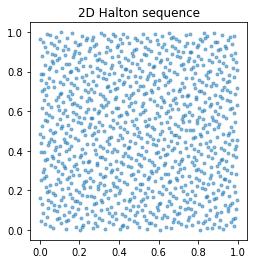

In [16]:
import matplotlib.pyplot as plt
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);

In [17]:
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 868.238928030592


In [18]:
#EXAMPLE
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(4*xx2) + 5*numpy.sin(xx1+2*xx2+3*xx3)**3 + 1.6 * (xx1**2)/10
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 130.9168582127286
